# 80. Regresyon Regülasyonu

- Lineer regresyon kayıp/yitim fonksiyonunu minimize etmeye çalışır.
- Her özellik(feature) için katsayı belirler. (alfa parametresi)
- Eğer bu katsayılar çok büyük olursa aşırı uyma (overfitting) ortaya çıkabilir.
- Regülasyon : Çok büyük katsayıları normalize(penalization) etmek.

**Ridge Regresyonu**

- Hata Fonksiyonu : En küçük kareler yöntemi(Ordinary Least Squares Method-OLS)
- Alfa : Karar verilmesi gereken bir parametre(Komşu sayısı gibi)
    - 0 alınırsa normal OLS fonksiyonu (Overfitting)
    - Çok yüksek bir değer alınırsa (Underfitting)
    - Model karmaşıklığı belirler.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
data = pd.read_csv('boston.csv')
#sci-kit learn
# rm ve medv değerleri ayrı ayrı saklanmalıdır.
X = data.drop('medv', axis = 1).values # target variable hariç tüm veriler
y = data['medv'].values # sadece target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 30)
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_prediction = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6983035084618544

**Lasso Regresyonu**

- Hata fonksiyonu = OLS fonksiyonu(a: mutlak değer) + alfa
- Veri setindeki önemli özellikleri(features) belirlenmekte kullanılabilir.

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_prediction = ridge.predict(X_test)
lasso.score(X_test, y_test)

0.626019940784288

In [30]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
features = data.drop('medv', axis = 1).columns
print(features)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')


In [32]:
lasso = Lasso(alpha = 0.1)
lasso_co = lasso.fit(X,y).coef_

In [33]:
print(lasso_co)

[-2.63096898e-03 -9.88112467e-02  5.08622520e-02 -3.62552070e-02
  9.76089597e-01 -0.00000000e+00  3.73125310e+00 -1.25600772e-02
 -1.18245816e+00  2.95032574e-01 -1.37893534e-02 -7.68361045e-01
  1.02838873e-02 -5.70047009e-01]


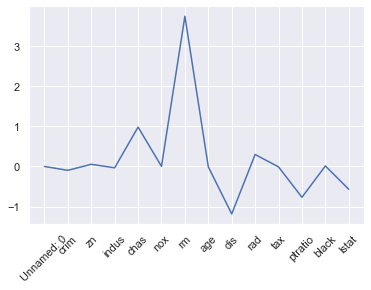

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(range(len(features)),  lasso_co)
plt.xticks(range(len(features)), features, rotation = 45)
plt.show()